Import packages and neighborhood labeled data

In [73]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
import networkx as nx
import sys
from functools import reduce
from scipy import stats



# Import modules from cellhier for neighborhoods
sys.path.append('G:/python_code')
from cellhier.knn_graph_neighborhood import Neighborhoods
from cellhier.general import catplot, conplot

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import MiniBatchKMeans

Populating the interactive namespace from numpy and matplotlib


In [2]:
save_path = 'G:/HuBMAP/B008_12/analysis/context/'
df = pd.read_csv("G:/HuBMAP/B008_12/Neighborhoods/05_25_HuBMAP_tunit.csv", index_col=0)
df.reset_index(inplace=True, drop=True)
df.columns

C:\Users\akoya-stanford\Anaconda3\envs\Up_Scanpy\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (62,63,70) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Index(['MUC2', 'SOX9', 'MUC1', 'CD31', 'Synapto', 'CD49f', 'CD15', 'CHGA',
       'CDX2', 'ITLN1', 'CD4', 'CD127', 'Vimentin', 'HLADR', 'CD8', 'CD11c',
       'CD44', 'CD16', 'BCL2', 'CD3', 'CD123', 'CD38', 'CD90', 'aSMA', 'CD21',
       'NKG2D', 'CD66', 'CD57', 'CD206', 'CD68', 'CD34', 'aDef5', 'CD7',
       'CD36', 'CD138', 'CD45RO', 'Cytokeratin', 'CD117', 'CD19', 'Podoplanin',
       'CD45', 'CD56', 'CD69', 'Ki67', 'CD49a', 'CD163', 'CD161',
       'first_index', 'x', 'y', 'tissue', 'donor', 'region', 'OLFM4', 'FAP',
       'CD25', 'CollIV', 'CK7', 'Xcorr', 'Ycorr', 'unique_region',
       'neigh_name', 'neigh_sub1', 'Preservation_method', 'Tissue_location',
       'array', 'Cell Type', 'Cell Type em', 'Cell subtype', 'machine', 'MUC6',
       'Neighborhood', 'Neighborhood_Ind', 'Neigh_sub', 'NeighInd_sub',
       'Community', 'Major Community', 'Tissue Segment', 'Tissue Unit'],
      dtype='object')

Create cell neighborhoods with a window size of 100 nearest neighbors with regard to the neighborhood

In [3]:
n_num = 300
ks=[n_num]
cluster_col = 'Community'
sum_cols=df[cluster_col].unique()
keep_cols = ['first_index', 'x', 'y', 'tissue', 'donor', 'region', 'OLFM4', 'FAP',
       'CD25', 'CollIV', 'CK7', 'Xcorr', 'Ycorr', 'unique_region',
       'neigh_name', 'neigh_sub1', 'Preservation_method', 'Tissue_location',
       'array', 'Cell Type', 'Cell Type em', 'Cell subtype', 'machine', 'MUC6',
       'Neighborhood', 'Neighborhood_Ind', 'Neigh_sub', 'NeighInd_sub',
       'Community', 'Major Community', 'Tissue Segment', 'Tissue Unit']
X='x'
Y='y'
Reg = 'unique_region'
Neigh = Neighborhoods(df,ks,cluster_col,sum_cols,keep_cols,X,Y,reg=Reg,add_dummies=True)
windows = Neigh.k_windows()

Starting: 1/64 : B004_Ascending
Finishing: 1/64 : B004_Ascending 1.0406975746154785 1.0446867942810059
Starting: 9/64 : B004_Descending
Finishing: 9/64 : B004_Descending 1.4188241958618164 2.4846556186676025
Starting: 49/64 : B004_Descending - Sigmoid
Finishing: 49/64 : B004_Descending - Sigmoid 1.1659400463104248 3.6797947883605957
Starting: 17/64 : B004_Duodenum
Finishing: 17/64 : B004_Duodenum 2.104386568069458 5.809115171432495
Starting: 25/64 : B004_Ileum
Finishing: 25/64 : B004_Ileum 1.236140251159668 7.0951220989227295
Starting: 34/64 : B004_Mid-jejunum
Finishing: 34/64 : B004_Mid-jejunum 1.7423977851867676 8.863699436187744
Starting: 41/64 : B004_Proximal Jejunum
Finishing: 41/64 : B004_Proximal Jejunum 1.4070615768432617 10.310300350189209
Starting: 57/64 : B004_Transverse
Finishing: 57/64 : B004_Transverse 1.6018481254577637 11.945060729980469
Starting: 2/64 : B005_Ascending
Finishing: 2/64 : B005_Ascending 0.8356101512908936 12.817675828933716
Starting: 10/64 : B005_Descendi

-------------------------

########################################################

In [4]:
#Choose the windows size to continue with
w = windows[n_num]

n_neighborhoods=7
n2_name = 'neigh_ofneigh'
k_centroids = {}

km = MiniBatchKMeans(n_clusters = n_neighborhoods,random_state=0)
labels = km.fit_predict(w[sum_cols].values)
k_centroids[n_num] = km.cluster_centers_
w[n2_name] = labels

C:\Users\akoya-stanford\Anaconda3\envs\Up_Scanpy\lib\site-packages\sklearn\cluster\_kmeans.py:887: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 8192 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


In [5]:
# #modify figure size aesthetics for each neighborhood
# figs = catplot(w,X = 'Xcorr',Y='Ycorr',exp = 'array',hue = n2_name,invert_y=True,size = 8,)

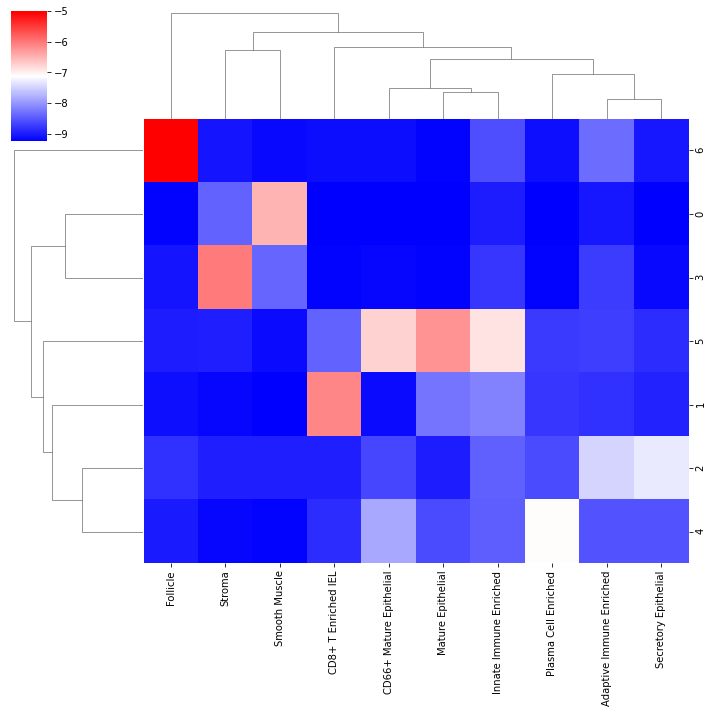

In [6]:
#this plot shows the types of cells (ClusterIDs) in the different niches (0-9)
k_to_plot = n_num
niche_clusters = (k_centroids[k_to_plot])
values = w[sum_cols].values
tissue_avgs = values.mean(axis = 0)
fc = np.log2(((niche_clusters+tissue_avgs)/(niche_clusters+tissue_avgs).sum(axis = 1, keepdims = True))/tissue_avgs)
fc = pd.DataFrame(fc,columns = sum_cols)
s=sns.clustermap(fc, cmap = 'bwr', vmax=-5)

------------------------

## Plot Barycentric

In [7]:
#Color dictionaries to use for consistency
cell_map = {
    'NK': 'blue',
 'Enterocyte': 'magenta',
 'MUC1+ Enterocyte': 'yellow',
 'TA': 'skyblue',
 'CD66+ Enterocyte': 'darkorange',
 'Paneth': 'green',
 'Smooth muscle': 'red',
 'Cycling TA': 'tan',
 'M1 Macrophage': 'gray',
 'Goblet': 'indigo',
 'Neuroendocrine': 'yellowgreen',
 'CD57+ Enterocyte': 'lightsalmon',
 'Lymphatic': 'plum',
 'CD8+ T': 'gold',
 'DC': 'blueviolet',
 'M2 Macrophage': 'bisque',
 'B': 'navy',
 'Neutrophil': 'goldenrod',
 'Endothelial': 'black',
 'Plasma': 'yellow',
 'CD4+ T cell': 'brown',
 'Stroma': 'dimgray',
 'Nerve': 'olive',
 'ICC': 'teal',
 'CD7+ Immune': 'lightcoral'}


neigh_map = {
 'Transit Amplifying Zone': 'darkblue',
 'Microvasculature': 'black',
 'Adaptive Immune Enriched': 'orange',
 'Glandular Epithelial': 'darkorange',
 'CD66+ Mature Epithelial': 'firebrick',
 'Stroma & Innate Immune': 'brown',
 'CD8+ T Enriched IEL': 'green',
 'Mature Epithelial': 'magenta',
 'Innate Immune Enriched': 'skyblue',
 'Outer Follicle': 'navy',
 'Plasma Cell Enriched': 'yellow',
 'Innervated Stroma': 'blueviolet',
 'Stroma': 'gray',
 'Macrovasculature': 'gold',
 'Secretory Epithelial': 'yellowgreen',
 'Smooth Muscle': 'red',
 'Innervated Smooth Muscle': 'lightgreen',
 'Inner Follicle': 'blue',
 'Smooth Muscle & Innate Immune': 'tan',
 'Paneth Enriched': 'lightblue'}


comm_map = {'Plasma Cell Enriched': 'yellow',
 'Mature Epithelial': 'magenta',
 'Innate Immune Enriched': 'brown',
 'Stroma': 'gray',
 'Follicle': 'blue',
 'Adaptive Immune Enriched': 'orange',
 'Smooth Muscle': 'red',
 'Secretory Epithelial': 'purple',
 'CD66+ Mature Epithelial': 'teal',
 'CD8+ T Enriched IEL': 'green'}

tissue_map = {
 'Submucosa': 'blue',
 'Muscularis externa': 'orange',
 'Muscularis mucosa': 'red',
 'Mucosa': 'green'
}

([<matplotlib.axis.XTick at 0x1697bb24c70>,
 [Text(0, 0, 'Plasma Cell Enriched'),
  Text(1, 0, 'Mature Epithelial'),
  Text(2, 0, 'Innate Immune Enriched'),
  Text(3, 0, 'Stroma'),
  Text(4, 0, 'Follicle'),
  Text(5, 0, 'Adaptive Immune Enriched'),
  Text(6, 0, 'Smooth Muscle'),
  Text(7, 0, 'Secretory Epithelial'),
  Text(8, 0, 'CD66+ Mature Epithelial'),
  Text(9, 0, 'CD8+ T Enriched IEL')])

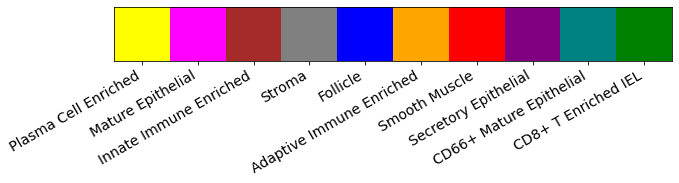

In [8]:
pal_color=comm_map
l=list(pal_color.keys())

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

#Settings for graph
plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

sns.palplot(pal_color.values())
plt.xticks(range(len(pal_color)),pal_color.keys(),rotation = 30,ha='right')
#plt.savefig(save_path+'color_legend.png', dpi=300)

In [9]:
lmap = {j:i for i,j in enumerate(l)}
palt=pal_color

In [10]:
# import sys
# cellhier_path = 'G:/cellhier'
# sys.path.append(cellhier_path)
# from cellhier.general import *

Can import all dataframe
-most important are the windows
-annotations
-x,y

100 good size to start with - larger than neighborhood & smaller to not see effects/slow down
90 handles tissue complexity but does not show a lot of noise

(-0.06005299799259893,
 1.0585464936459799,
 -0.05287650935525627,
 0.9146029407077773)

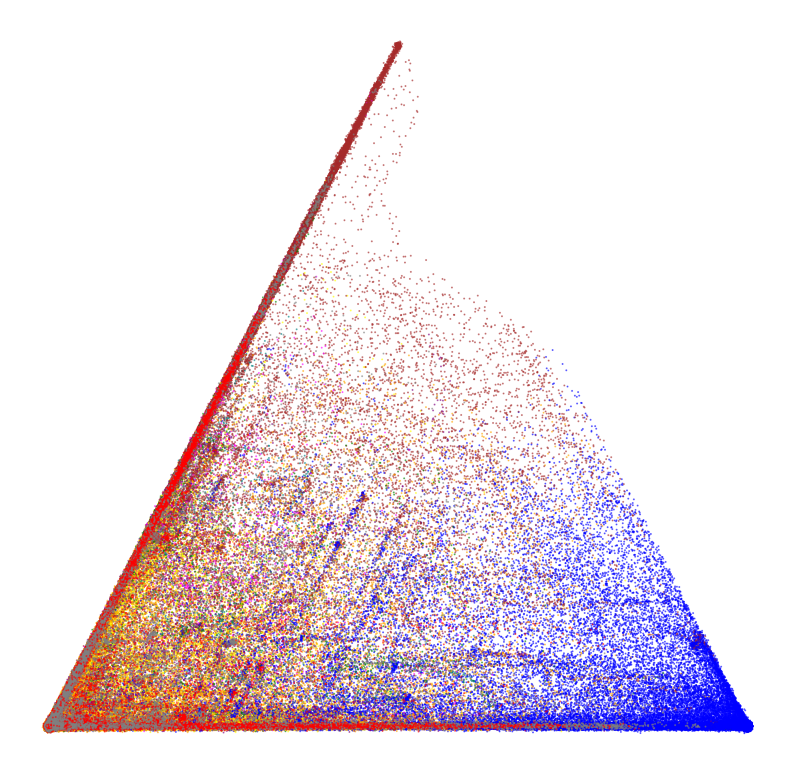

In [11]:
# '''
# this code samples the GC CNs and projects them into barycentric coordinates
# 90 is threshold such that 90% of the total neighborhoods come from these in the combination
# '''

list_n = [ 'Adaptive Immune Enriched',
 'Innate Immune Enriched',
 'Follicle',]
wgc  = w.loc[w.loc[:,list_n].sum(axis=1)>85,:]
idx = wgc.index.values
xl = wgc.loc[:,list_n]
proj = np.array([[0,0],[np.cos(np.pi/3),np.sin(np.pi/3)], [1,0]])
coords = np.dot(xl/n_num,proj) #####window size fraction

figsize(14,14)
jit = .002
cols = [palt[a] for a in wgc[cluster_col]]
plt.scatter(coords[:,0]+jit*np.random.randn(len(coords)),coords[:,1]+jit*np.random.randn(len(coords)),s = 1,alpha = .5, c = cols)
plt.axis('off')

In [12]:
'''
this is the code that finds the minimal combination of CNs
required to make up a threshold percentage of assignments in a window
combinations are stored as a sorted tuple
'''
def get_thresh_simps(x,thresh):
    sorts = np.argsort(-x, axis = 1)
    x_sorted = -np.sort(-x, axis = 1)
    cumsums = np.cumsum(x_sorted,axis = 1)
    thresh_simps = pd.Series([tuple(sorted(sorts[i,:(1+j)])) for i,j in enumerate(np.argmax(cumsums>thresh,axis = 1))])
    return thresh_simps

In [13]:
w.loc[:,l]

,Plasma Cell Enriched,Mature Epithelial,Innate Immune Enriched,Stroma,Follicle,Adaptive Immune Enriched,Smooth Muscle,Secretory Epithelial,CD66+ Mature Epithelial,CD8+ T Enriched IEL
0,242.0,5.0,0.0,0.0,0.0,11.0,0.0,20.0,22.0,0.0
1,241.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,25.0,115.0,0.0,50.0,91.0,19.0,0.0,0.0
3,56.0,0.0,6.0,13.0,176.0,8.0,0.0,41.0,0.0,0.0
4,0.0,0.0,0.0,0.0,300.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
2511997,0.0,0.0,0.0,49.0,0.0,0.0,251.0,0.0,0.0,0.0
2511998,0.0,0.0,0.0,2.0,0.0,0.0,298.0,0.0,0.0,0.0
2511999,0.0,0.0,0.0,100.0,0.0,0.0,200.0,0.0,0.0,0.0
2512000,0.0,0.0,0.0,71.0,0.0,0.0,229.0,0.0,0.0,0.0


In [14]:
#w = pd.read_pickle('cn_windows_50thru1000/100_windows')
#need to normalize by number of neighborhoods or k chosen for the neighborhoods
xm = w.loc[:,l].values/n_num

In [15]:
# Get the neighborhood combinations based on the threshold
simps = get_thresh_simps(xm,.85)
simp_freqs = simps.value_counts(normalize = True)
simp_sums = np.cumsum(simp_freqs)

In [16]:
#See the percent to keep threshold or percent of neigbhorhoods that fall above a certain threshold
per_keep_thres = 0.85
test_sums_thres =simp_sums[simp_sums < per_keep_thres]
test_len = len(test_sums_thres)
per_values_above = simp_sums[test_len]-simp_sums[test_len-1]
print(test_len, per_values_above)

42 0.004382958293823069


In [17]:
w['combination'] = [tuple(l[a] for a in s) for s in simps]
w['combination_num'] = [tuple(a for a in s) for s in simps]

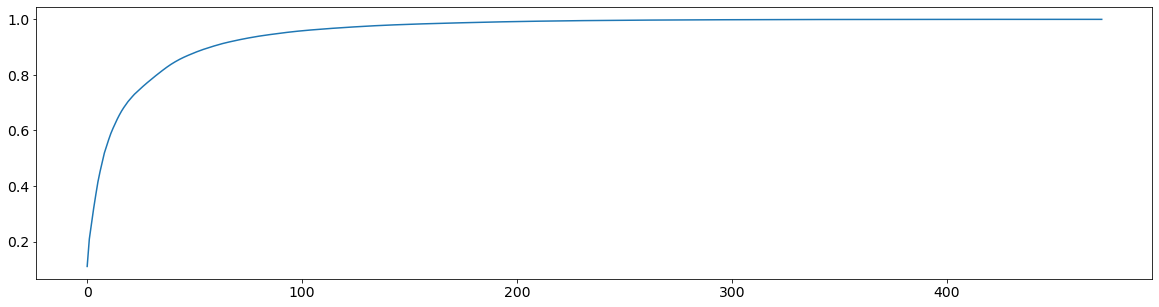

In [18]:
# this shows what proportion (y) of the total cells are assigned to the top x combinations
figsize(20,5)
plt.plot(simp_sums.values)

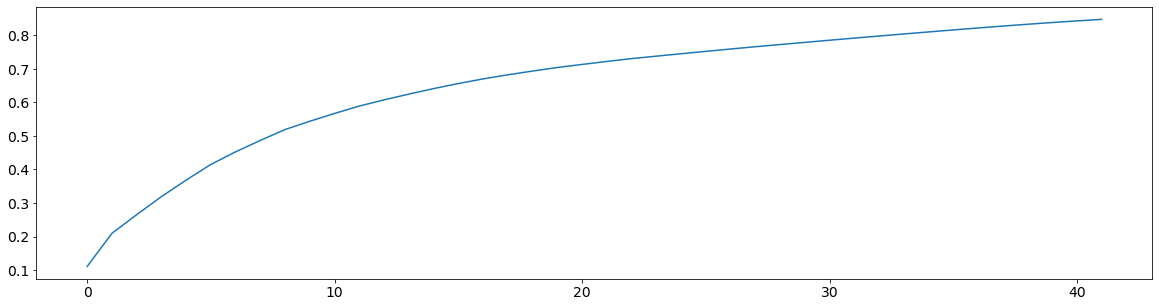

In [19]:
# this shows what proportion (y) of the total cells are assigned to the top x combinations
figsize(20,5)
plt.plot(test_sums_thres.values)
#plt.xticks(range(0,350,35),range(0,350,35),rotation = 90,fontsize = 10);

The following plots show that we start missing out some important bits when we cut the number of combinations we visualise

B012_Duodenum


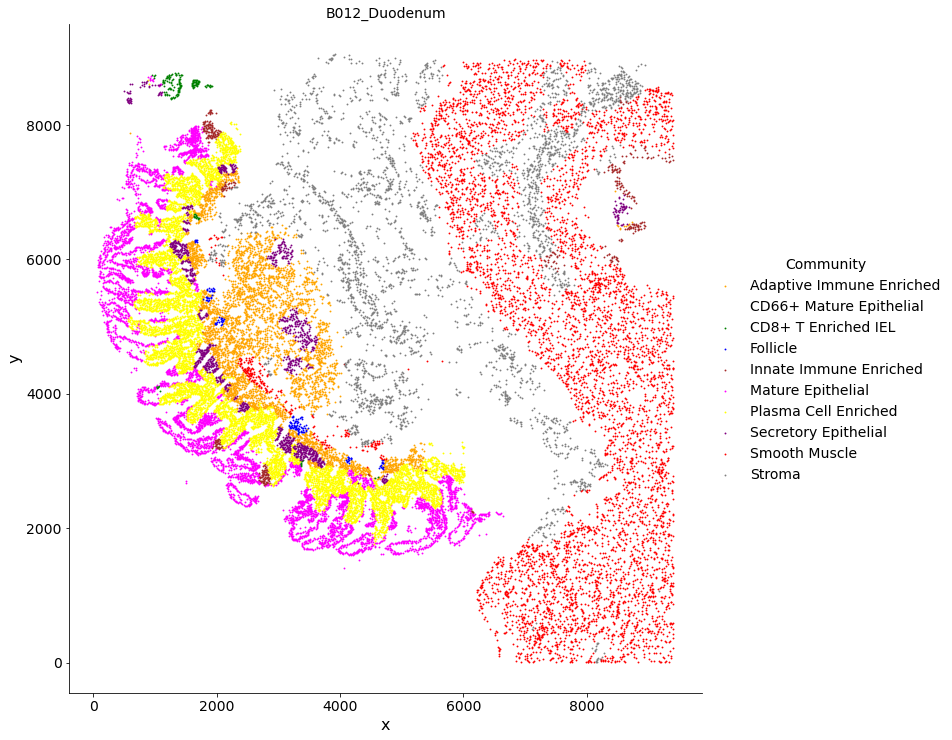

In [20]:
selected_cells = simps[simps.isin(simp_sums[simp_sums<=.90].index.values)]
catplot(w.loc[selected_cells.index.values],hue = cluster_col,exp=Reg,X='x',Y='y',exps=['B012_Duodenum'],palette = palt,figsize =10)

B012_Duodenum


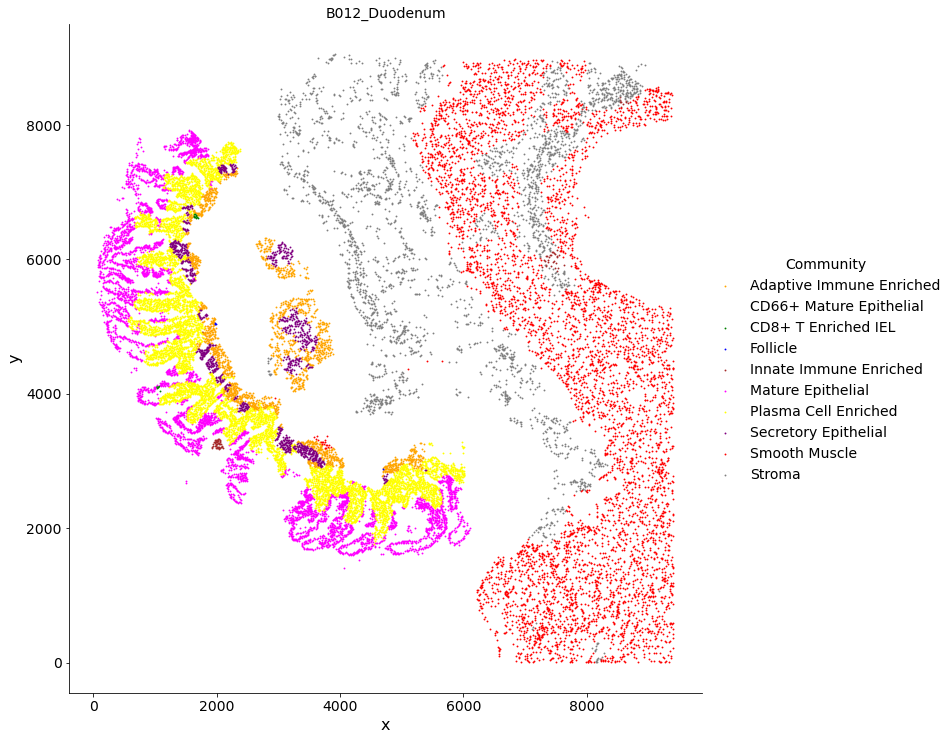

In [21]:
selected_cells = simps[simps.isin(simp_sums[simp_sums<=.7].index.values)]
catplot(w.loc[selected_cells.index.values],hue = cluster_col,exp=Reg,X='x',Y='y',exps=['B012_Duodenum'],palette = palt,figsize =10)

We appear to gain some systematic bias by taking only those simplices up to .9 in sum. .95 seems a little better, but the tradeoff is between what the graph looks like at .95 and .99.

In [22]:
#TODO
    #Subset the simp_sums by fold enrichment in one tissue versus another
    #Define selection rules 
        #differential from averages
        #Must be in 2/3 replicates
    #For those that do not meet a certain percentage cutoff - e.g..001 percent of all neighborhoods, then coerce to become something similar
    #Try out the clustering of the neighborhood analysis with this - understand interfaces
    

B012_Duodenum


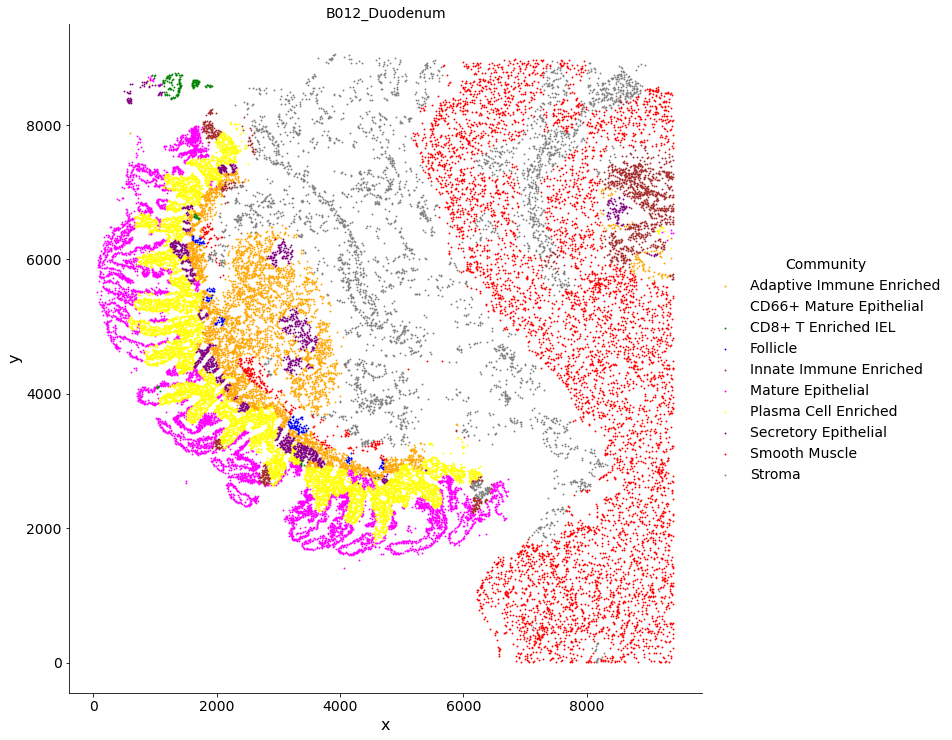

In [23]:
selected_cells = simps[simps.isin(simp_sums[simp_freqs>=.0005].index.values)]
catplot(w.loc[selected_cells.index.values],hue = cluster_col,exp=Reg,X='x',Y='y',exps=['B012_Duodenum'],palette = palt,figsize =10)

Make network graph using the threshold above
Just need to make selected_simps for the next round based on whatever selectino criteria

In [24]:
simp_freqs

(6,)                  1.107412e-01
(0, 7)                9.877978e-02
(3, 6)                5.560465e-02
(0,)                  5.380688e-02
(5, 7)                4.935147e-02
                          ...     
(0, 2, 4, 5, 6, 9)    3.980889e-07
(0, 1, 2, 3, 5, 8)    3.980889e-07
(0, 1, 3, 5, 7, 9)    3.980889e-07
(1, 3, 4)             3.980889e-07
(0, 2, 3, 5, 7, 8)    3.980889e-07
Length: 473, dtype: float64

In [25]:
g = nx.DiGraph()
thresh_cumulative = .95
thresh_freq = .001
#selected_simps = simp_sums[simp_sums<=thresh_cumulative].index.values
selected_simps = simp_freqs[simp_freqs>=thresh_freq].index.values
selected_simps

array([(6,), (0, 7), (3, 6), (0,), (5, 7), (3,), (7,), (9,), (0, 5, 7),
       (4,), (0, 9), (1, 9), (0, 5), (0, 1), (1,), (0, 8), (5, 6, 7),
       (0, 2, 7), (2, 9), (0, 2), (2, 7), (0, 7, 9), (7, 9), (1, 2),
       (0, 5, 9), (3, 5, 6), (0, 7, 8), (3, 5), (4, 5), (0, 2, 9),
       (2, 5, 7), (0, 1, 2), (0, 1, 7), (3, 5, 7), (1, 7), (5, 6),
       (4, 5, 7), (5,), (2, 7, 9), (1, 2, 9), (5, 7, 9), (0, 4, 5),
       (0, 1, 9), (0, 2, 5), (5, 9), (1, 7, 9), (1, 2, 7), (0, 2, 8),
       (0, 5, 6), (2, 6), (4, 7), (0, 1, 5), (2, 3), (8,), (0, 2, 5, 7),
       (7, 8), (2, 3, 6), (0, 5, 6, 7), (3, 7), (0, 5, 7, 9), (2, 7, 8),
       (3, 5, 6, 7), (2, 4, 5), (6, 7), (0, 4, 7), (2, 4), (0, 4),
       (0, 3, 5), (0, 2, 7, 9), (4, 5, 6), (0, 1, 2, 7), (2, 8), (2, 5),
       (3, 4), (2, 3, 5), (0, 4, 5, 7), (2, 5, 9), (2, 5, 6),
       (0, 2, 7, 8), (3, 6, 7), (0, 1, 2, 9), (0, 3, 5, 7), (2,),
       (1, 5, 7), (0, 2, 3), (1, 2, 3), (1, 2, 5, 7), (0, 6, 7),
       (2, 5, 7, 9), (2, 3, 5, 7), (4,

In [26]:
'''
this builds the graph for the CN combination map
'''
for e0 in selected_simps:
    for e1 in selected_simps:
        if (set(list(e0))<set(list(e1))) and (len(e1) == len(e0)+1):
            g.add_edge(e0,e1)

In [27]:
#Uses the top 20 combinations - for asterix
tops = simp_freqs[simp_freqs>=thresh_freq].sort_values(ascending = False).index.values.tolist()[:20]

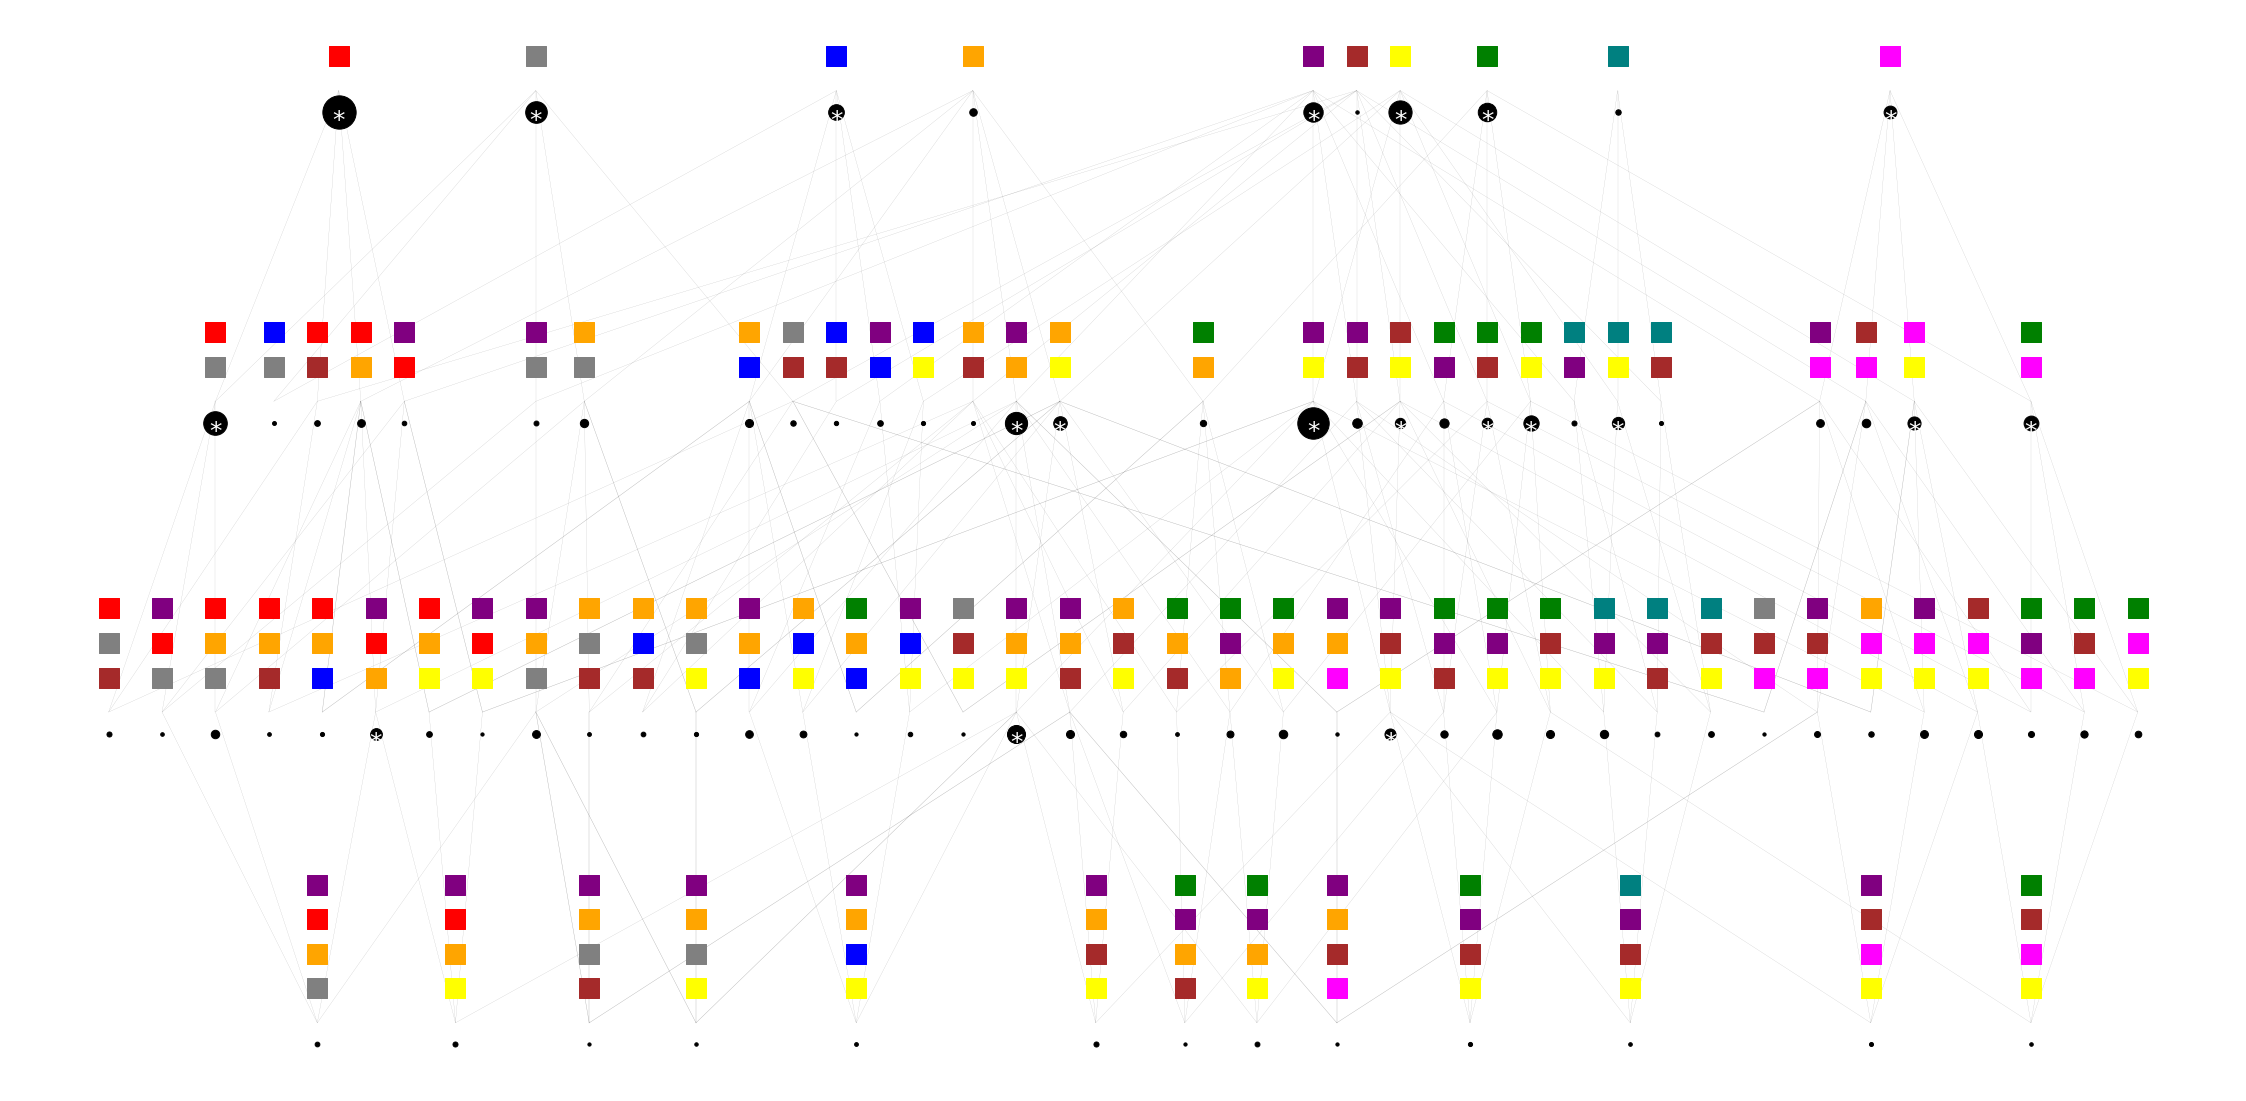

In [28]:
'''
this plots the CN combination map
'''
draw = g
pos = nx.drawing.nx_pydot.graphviz_layout(draw, prog='dot')
height = 8

figsize(40,20)
for n in draw.nodes():
    col = 'black'
    if len(draw.in_edges(n))<len(n):
        col = 'black'
    plt.scatter(pos[n][0],pos[n][1]-5, s = simp_freqs[list(simp_freqs.index).index(n)]*10000, c = col, zorder = -1)
    if n in tops:
        plt.text(pos[n][0],pos[n][1]-7, '*', fontsize = 25, color = 'white', ha = 'center', va = 'center',zorder = 20)
    delta = 8
    #plot_sim((pos[n][0]+delta, pos[n][1]+delta),n, scale = 20,s = 200,text = True,fontsize = 15)
    plt.scatter([pos[n][0]]*len(n),[pos[n][1]+delta*(i+1) for i in range(len(n))],c = [palt[l[i]] for i in n] ,marker = 's', zorder = 5,s = 400)
    
#     #add profiles below node
#     x = pos[n][0]
#     y = pos[n][1]
#     y = y-height*2
#     standard_node_size =  16
#     node_heights = [0,3,8,5,3,2,1,5]
#     marker_colors = ['red','red','blue','blue','red','red','blue','blue']
    
#     plt.plot([x+(18*(i-1.5)) for i in range(len(node_heights))],[(y-height*.9)+v for v in node_heights],c = 'red',zorder =3)#,s = v*2 ,c= c,edgecolors='black',lw = 1)
#     plt.scatter([x+(18*(i-1.5)) for i in range(len(node_heights))],[(y-height*.9)+v for v in node_heights],c = marker_colors,s = standard_node_size,zorder = 4)
    
        
j = 0
for e0,e1 in draw.edges():
    weight = 0.2
    alpha = .3
    color='black'
    if len(draw.in_edges(e1))<len(e1):
        color = 'black'
        lw =1
        weight = 0.4
        
#     if (e0,e1) in set(draw.out_edges(tuple(sorted([lmap['3'],lmap['1']])))):
#         j+=1
#         print(j)
#         color = 'green'
#         weight = 2
#         alpha = 1
        
#     if (lmap['3'] in e0) and (lmap['1'] not in e0) and (lmap['1'] in e1):
#         color = 'green'
#         weight = 2
#         alpha = 1

    plt.plot([pos[e0][0], pos[e1][0]],[pos[e0][1], pos[e1][1]], color = color, linewidth = weight,alpha = alpha,zorder = -10)

plt.axis('off')
#plt.savefig('CNM.pdf')
plt.show()


In [42]:
def get_network(subset_list, ttl_per_thres, comb_per_thres,fig_size=(40,20),sub_col='Tissue Unit',\
                neigh_sub=None, save_name=None):
    
    #Choose the windows size to continue with
    w = windows[n_num]
    w = w[w.tissue.isin(subset_list)]
    if neigh_sub:
        w = w[w[sub_col].isin(neigh_sub)]
    xm = w.loc[:,l].values/n_num
          
    # Get the neighborhood combinations based on the threshold
    simps = get_thresh_simps(xm,ttl_per_thres)
    simp_freqs = simps.value_counts(normalize = True)
    simp_sums = np.cumsum(simp_freqs)
          
    g = nx.DiGraph()
    thresh_cumulative = .95
    thresh_freq = comb_per_thres
    #selected_simps = simp_sums[simp_sums<=thresh_cumulative].index.values
    selected_simps = simp_freqs[simp_freqs>=thresh_freq].index.values
          
    #this builds the graph for the CN combination map
    selected_simps
    for e0 in selected_simps:
        for e1 in selected_simps:
            if (set(list(e0))<set(list(e1))) and (len(e1) == len(e0)+1):
                g.add_edge(e0,e1)   

    #this plots the CN combination map

    draw = g
    pos = nx.drawing.nx_pydot.graphviz_layout(draw, prog='dot')
    height = 8

    figsize(*fig_size)
    for n in draw.nodes():
        col = 'black'
        if len(draw.in_edges(n))<len(n):
            col = 'black'
        plt.scatter(pos[n][0],pos[n][1]-5, s = simp_freqs[list(simp_freqs.index).index(n)]*10000, c = col, zorder = -1)
#         if n in tops:
#             plt.text(pos[n][0],pos[n][1]-7, '*', fontsize = 25, color = 'white', ha = 'center', va = 'center',zorder = 20)
        delta = 8
        #plot_sim((pos[n][0]+delta, pos[n][1]+delta),n, scale = 20,s = 200,text = True,fontsize = 15)
        plt.scatter([pos[n][0]]*len(n),[pos[n][1]+delta*(i+1) for i in range(len(n))],c = [palt[l[i]] for i in n] ,marker = '^', zorder = 5,s = 400)

    j = 0
    for e0,e1 in draw.edges():
        weight = 0.2
        alpha = .3
        if len(draw.in_edges(e1))<len(e1):
            color = 'black'
            lw =1
            weight = 0.4
        color='black'
        plt.plot([pos[e0][0], pos[e1][0]],[pos[e0][1], pos[e1][1]], color = color, linewidth = weight,alpha = alpha,zorder = -10)

    plt.axis('off')
    if save_name is not None:
        plt.savefig(save_path+save_name+'_spatial_contexts.pdf')#'.png', dpi=300)
    plt.show()



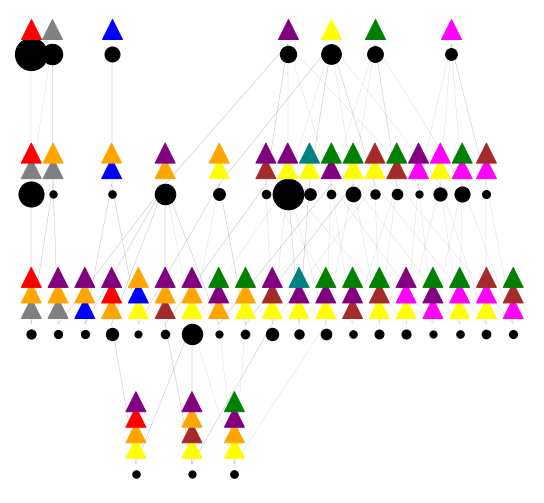

In [213]:
get_network(subset_list=['SB','CL'],ttl_per_thres=0.9, comb_per_thres=0.005,fig_size=(9.5,9),\
            neigh_sub = ['Mucosa','Submucosa','Muscularis mucosa','Muscularis externa'],save_name='All_comm')

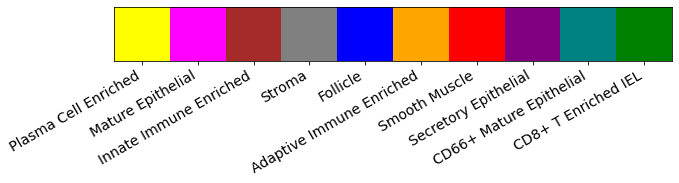

In [31]:
sns.palplot(pal_color.values())
plt.xticks(range(len(pal_color)),pal_color.keys(),rotation = 30,ha='right'
          );

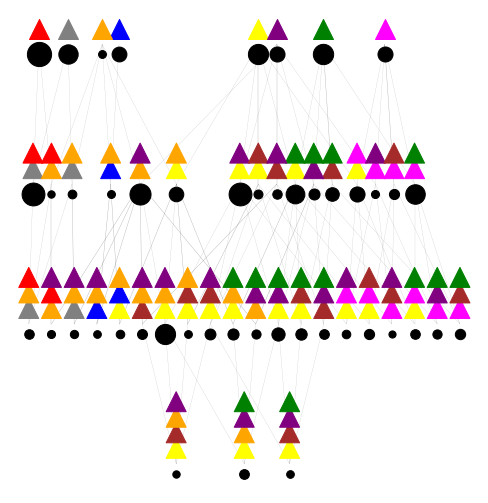

In [44]:
get_network(subset_list=['SB',],ttl_per_thres=0.9, comb_per_thres=0.005,fig_size=(8.5,9),\
            neigh_sub = ['Mucosa','Submucosa','Muscularis mucosa','Muscularis externa'],save_name='SB_All_comm')

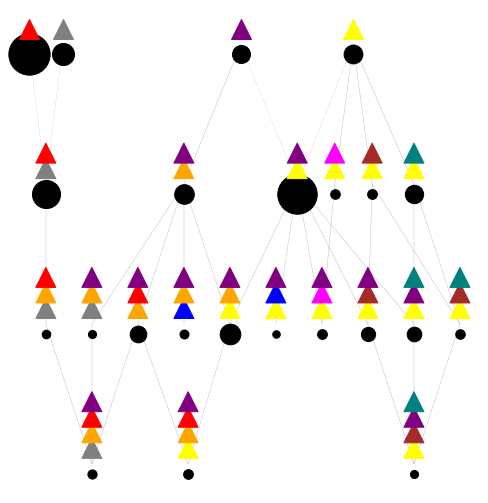

In [43]:
get_network(subset_list=['CL',],ttl_per_thres=0.9, comb_per_thres=0.005,fig_size=(8.5,9),\
            neigh_sub = ['Mucosa','Submucosa','Muscularis mucosa','Muscularis externa'],save_name='CL_All_comm')

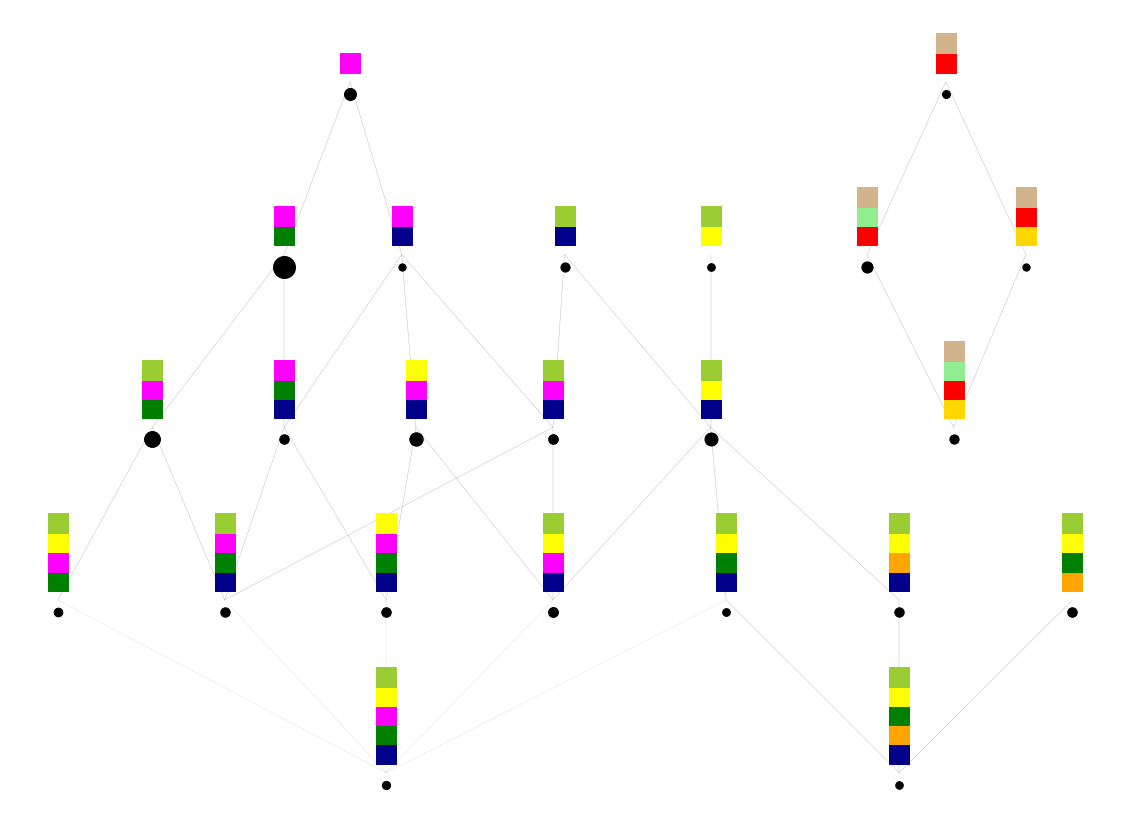

In [53]:
get_network(subset_list=['SB'],ttl_per_thres=0.85, comb_per_thres=0.005,fig_size=(20,15),save_name='SB')

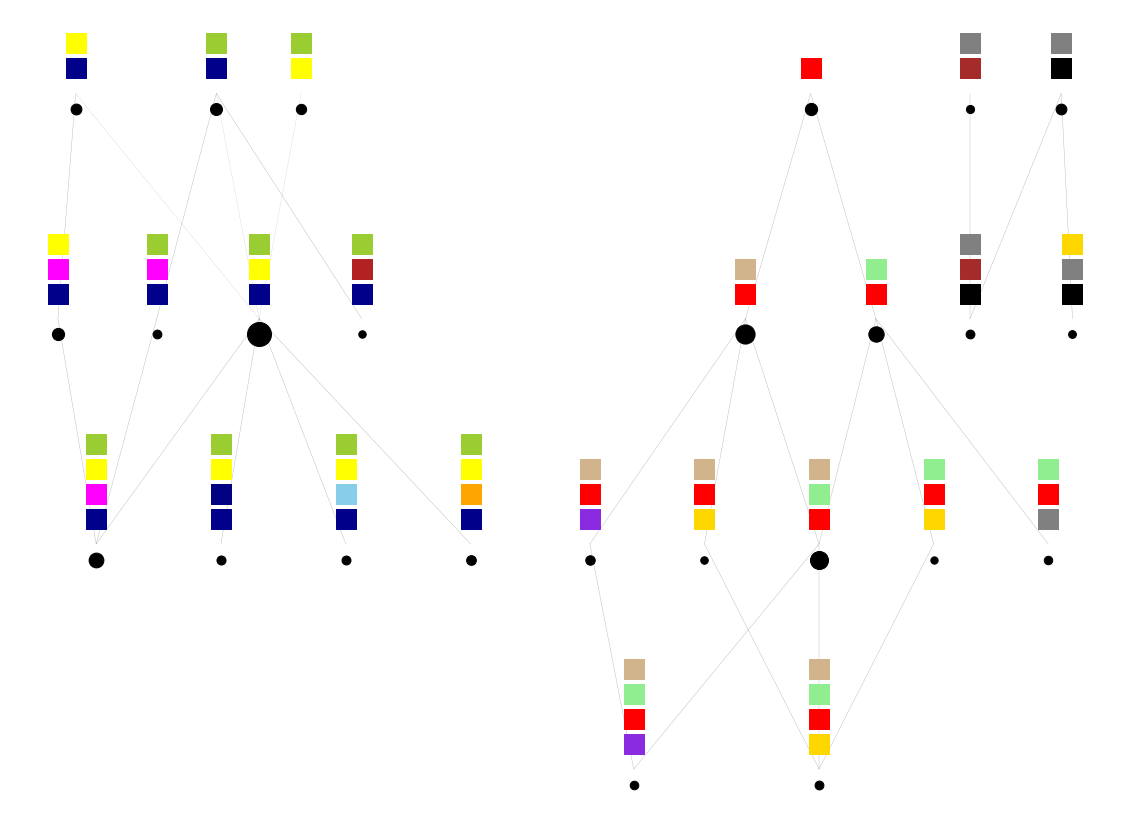

In [54]:
get_network(subset_list=['CL'],ttl_per_thres=0.85, comb_per_thres=0.005,fig_size=(20,15),save_name='CL')

In [56]:
df['Tissue Unit'].unique()

array(['Mucosa', 'Muscularis mucosa', 'Submucosa', 'Muscularis externa'],
      dtype=object)

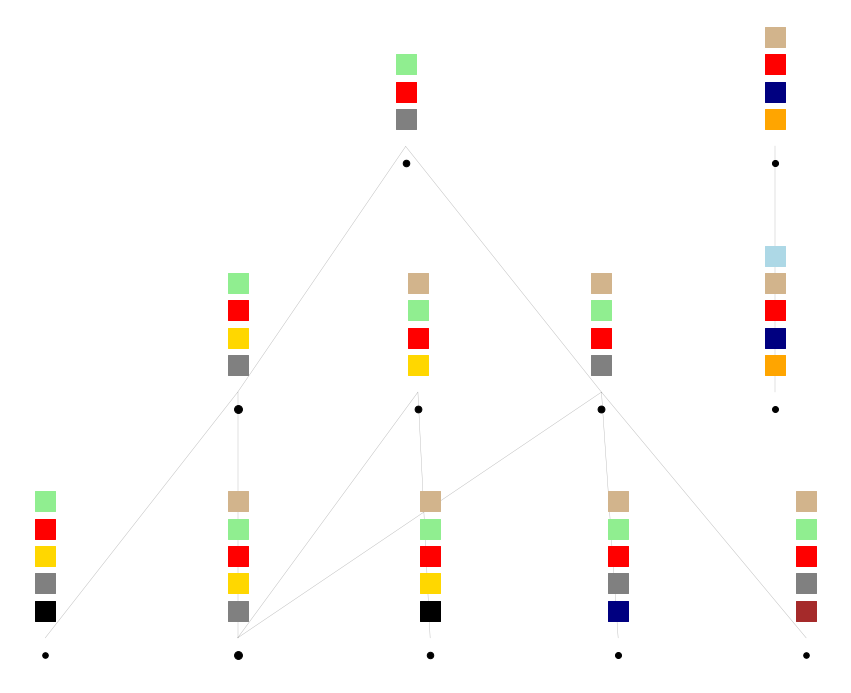

In [68]:
get_network(subset_list=['SB'],ttl_per_thres=0.85, comb_per_thres=0.003,fig_size=(15,12.5),\
            neigh_sub = ['Muscularis mucosa'],save_name='SB_mmuc')

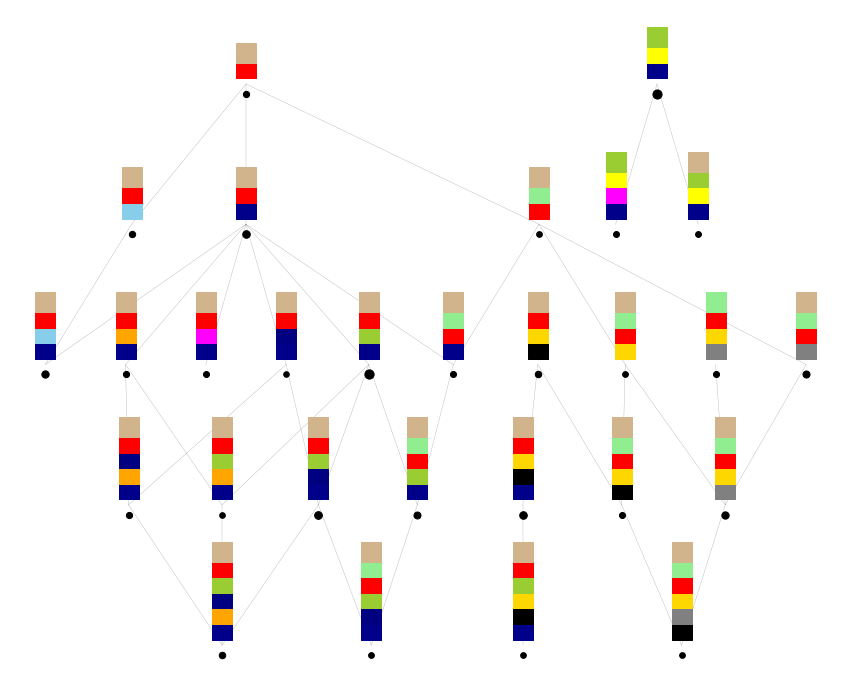

In [67]:
get_network(subset_list=['CL'],ttl_per_thres=0.85, comb_per_thres=0.003,fig_size=(15,12.5),\
            neigh_sub = ['Muscularis mucosa'],save_name='CL_mmuc')

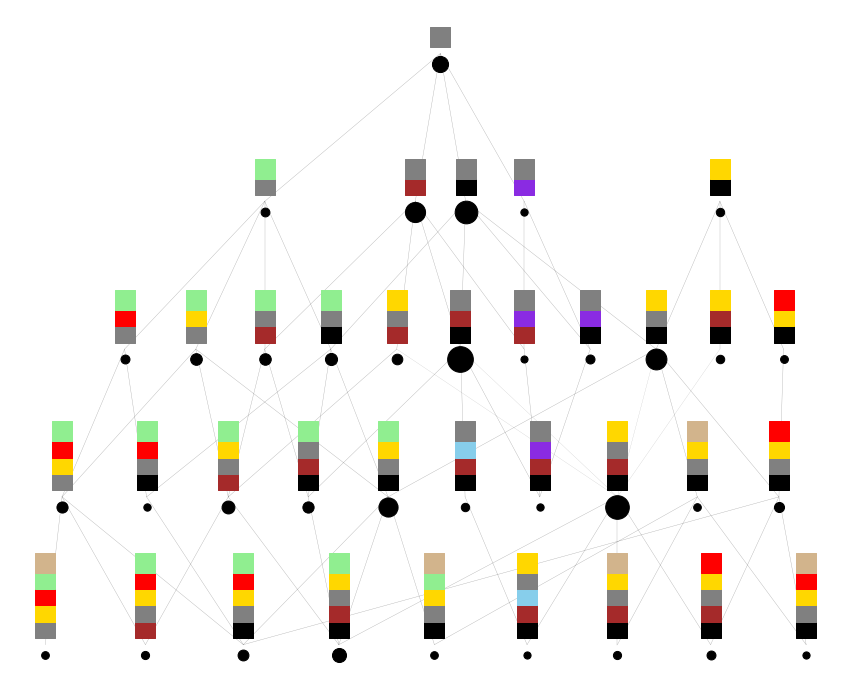

In [69]:
get_network(subset_list=['SB'],ttl_per_thres=0.85, comb_per_thres=0.005,fig_size=(15,12.5),\
            neigh_sub = ['Submucosa'],save_name='SB_smuc')

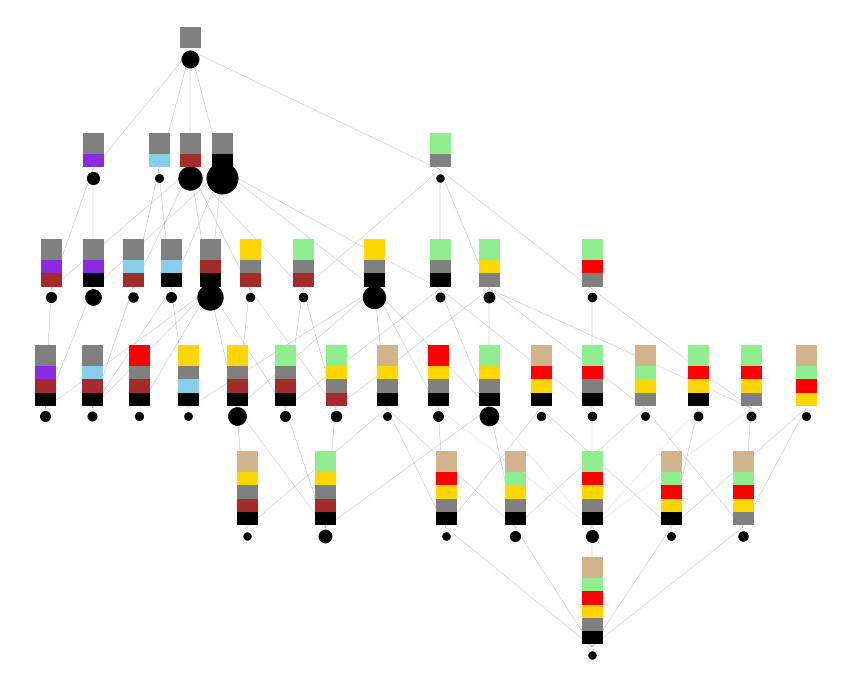

In [70]:
get_network(subset_list=['CL'],ttl_per_thres=0.85, comb_per_thres=0.005,fig_size=(15,12.5),\
            neigh_sub = ['Submucosa'],save_name='CL_smuc')

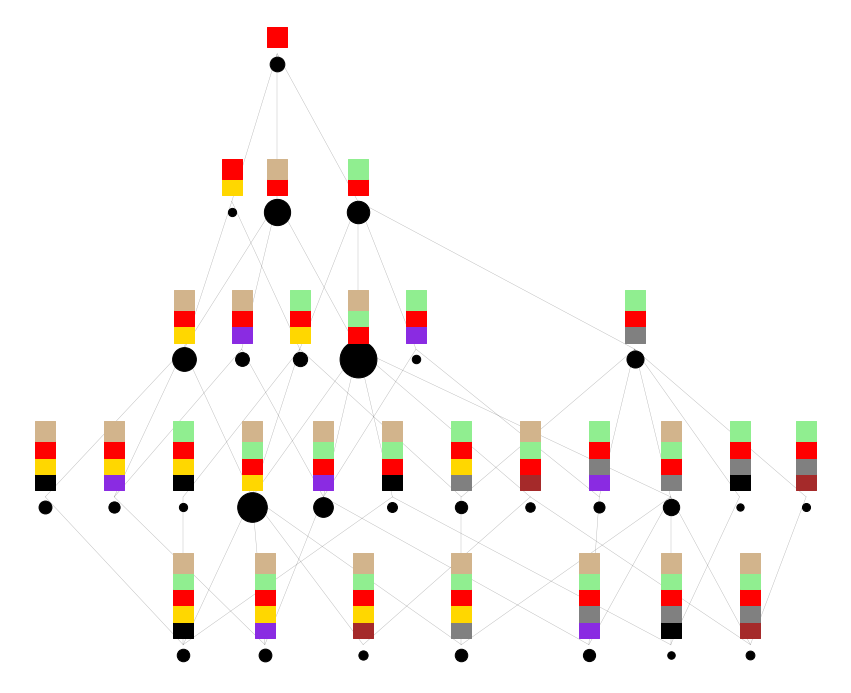

In [73]:
get_network(subset_list=['SB'],ttl_per_thres=0.85, comb_per_thres=0.005,fig_size=(15,12.5),\
            neigh_sub = ['Muscularis externa'],save_name='SB_me')

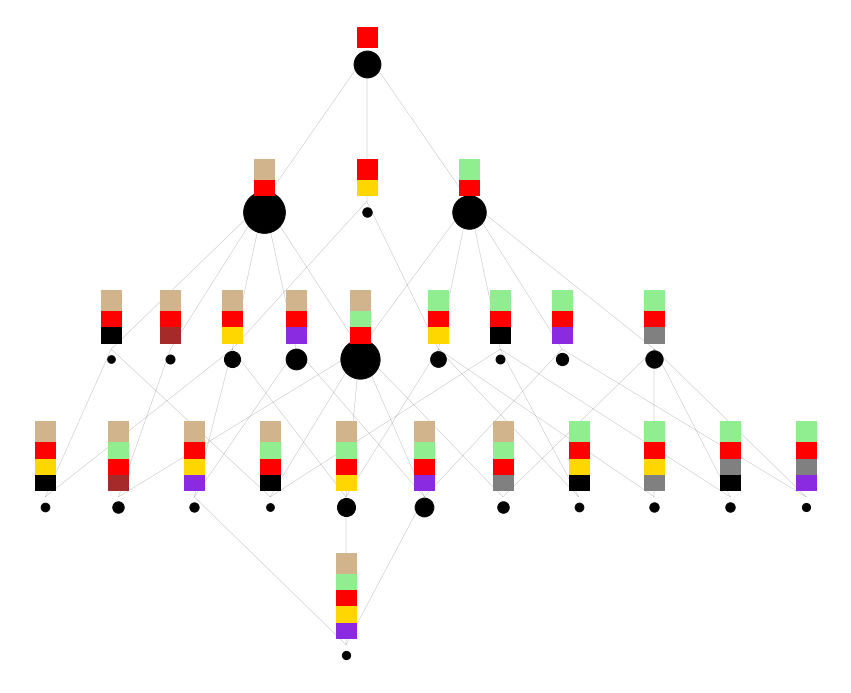

In [72]:
get_network(subset_list=['CL'],ttl_per_thres=0.85, comb_per_thres=0.005,fig_size=(15,12.5),\
            neigh_sub = ['Muscularis externa'],save_name='CL_me')

## Stats

In [49]:
data_compare = windows[n_num]
data_compare['patient'] = data_compare['donor']+'_'+data_compare['tissue'].astype(str)
data_compare['patient'].unique()

array(['B004_CL', 'B005_CL', 'B006_CL', 'B009_CL', 'B010_CL', 'B011_CL',
       'B012_CL', 'B008_CL', 'B004_SB', 'B005_SB', 'B006_SB', 'B009_SB',
       'B011_SB', 'B012_SB', 'B010_SB', 'B008_SB'], dtype=object)

In [97]:
def simp_rep(data, patient_col, subset_list, ttl_per_thres, comb_per_thres, thres_num = 3):
    
    #Choose the windows size to continue with
    w2 = data.loc[data['tissue'].isin(subset_list)]
    
    simp_list = []
    for patient in list(w2[patient_col].unique()):
        w = w2.loc[w2[patient_col]==patient]
        xm = w.loc[:,l].values/n_num

        # Get the neighborhood combinations based on the threshold
        simps = get_thresh_simps(xm,ttl_per_thres)
        simp_freqs = simps.value_counts(normalize = True)
        sf = simp_freqs.to_frame()
        sf.rename(columns={0:patient},inplace=True)
        sf.reset_index(inplace=True)
        sf.rename(columns={'index':'merge'},inplace=True)
        simp_list.append(sf)
        #simp_sums = np.cumsum(simp_freqs)

        #thresh_cumulative = .95
        #selected_simps = simp_sums[simp_sums<=thresh_cumulative].index.values
       # selected_simps = simp_freqs[simp_freqs>=comb_per_thres].index.values
    
    simp_df = reduce(lambda  left,right: pd.merge(left,right,on=['merge'],
                                            how='outer'), simp_list)
    #simp_df = pd.concat(simp_list, axis=0)
    #simp_df.index = simp_df.index.to_series()
    simp_df.fillna(0,inplace=True)
    simp_df.set_index('merge', inplace=True)
    simp_out = simp_df.loc[simp_df.gt(0).sum(axis=1).ge(thres_num)]

    return simp_out

In [52]:
lmap

{'Plasma Cell Enriched': 0,
 'Mature Epithelial': 1,
 'Innate Immune Enriched': 2,
 'Stroma': 3,
 'Follicle': 4,
 'Adaptive Immune Enriched': 5,
 'Smooth Muscle': 6,
 'Secretory Epithelial': 7,
 'CD66+ Mature Epithelial': 8,
 'CD8+ T Enriched IEL': 9}

In [184]:
total_per_thres = 0.9
comb_per_thres = 0.005

simp_df_SB = simp_rep(data = data_compare, patient_col='patient', subset_list=['SB'],\
                      ttl_per_thres=total_per_thres, comb_per_thres=comb_per_thres, thres_num = 6)
simp_df_CL = simp_rep(data = data_compare, patient_col='patient', subset_list=['CL'],\
                      ttl_per_thres=total_per_thres, comb_per_thres=comb_per_thres, thres_num = 6)
simp_df_CL

,B004_CL,B005_CL,B006_CL,B009_CL,B010_CL,B011_CL,B012_CL,B008_CL
merge,,,,,,,,
"(0, 8)",0.180832,0.008750,0.043562,0.003282,0.033984,0.035679,0.004799,0.002823
"(0, 7)",0.145562,0.082288,0.198834,0.128494,0.101941,0.162376,0.254433,0.124313
"(6,)",0.110952,0.126355,0.069422,0.294034,0.246684,0.095665,0.058351,0.335836
"(0,)",0.069111,0.008207,0.009091,0.029760,0.002155,0.012937,0.072490,0.051455
"(4,)",0.041308,0.003195,0.063306,0.031401,0.000000,0.000000,0.007238,0.029751
...,...,...,...,...,...,...,...,...
"(0, 2, 4, 5, 7)",0.000009,0.001533,0.000794,0.000512,0.000600,0.000000,0.000253,0.000000
"(2, 5, 7, 8)",0.000009,0.007691,0.000227,0.000028,0.003956,0.004359,0.000000,0.000000
"(5, 6)",0.000000,0.002919,0.006936,0.002120,0.000698,0.001183,0.001155,0.004583


In [99]:
plot_order1 = ['SB','CL']
pal_tis = {'SB':'blue','CL':'orange'}

In [100]:
def comb_num_freq(data_list):
    df_new = []
    for df in data_list:
        df.reset_index(inplace=True)
        df.rename(columns={'merge':'combination'},inplace=True)
        df['count'] = df['combination'].apply(len)
        sum_df = df.groupby('count').sum()
        
        tbt = sum_df.reset_index()
        ttt = tbt.melt(id_vars = ['count'])
        ttt.rename(columns={'variable':'unique_cond','value':'fraction'}, inplace=True)
        df_new.append(ttt)
    df_exp = pd.concat(df_new)
    
    df_exp[['donor', 'tissue']] = df_exp['unique_cond'].str.split('_',expand=True)
    
    
    #swarmplot to compare 
    plt.figure(figsize=(5,5))

    ax = sns.boxplot(data = df_exp, x='count',  y='fraction', hue = 'tissue', dodge=True, \
                     hue_order=plot_order, palette=pal_tis)
    ax = sns.swarmplot(data = df_exp, x='count', y='fraction', hue = 'tissue', dodge=True, \
                      hue_order=plot_order, edgecolor='black',linewidth=1, palette=pal_tis)
    for patch in ax.artists:
        r, g, b, a = patch.get_facecolor()
        patch.set_facecolor((r, g, b, .3))
    #ax.set_yscale(\log\)
    plt.xlabel('')
    handles, labels = ax.get_legend_handles_labels()
    plt.legend(handles[:len(df_exp['tissue'].unique())], labels[:len(df_exp['tissue'].unique())],\
               bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
    plt.xticks(rotation=90)
    sns.despine(trim=True)
    
    return df_exp

C:\Users\akoya-stanford\Anaconda3\envs\Up_Scanpy\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 12.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akoya-stanford\Anaconda3\envs\Up_Scanpy\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\akoya-stanford\Anaconda3\envs\Up_Scanpy\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 62.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


,count,unique_cond,fraction,donor,tissue
0,1,B004_SB,0.219757,B004,SB
1,2,B004_SB,0.350369,B004,SB
2,3,B004_SB,0.302117,B004,SB
3,4,B004_SB,0.096214,B004,SB
4,5,B004_SB,0.015452,B004,SB
...,...,...,...,...,...
43,2,B008_CL,0.327073,B008,CL
44,3,B008_CL,0.128859,B008,CL
45,4,B008_CL,0.048697,B008,CL
46,5,B008_CL,0.003245,B008,CL


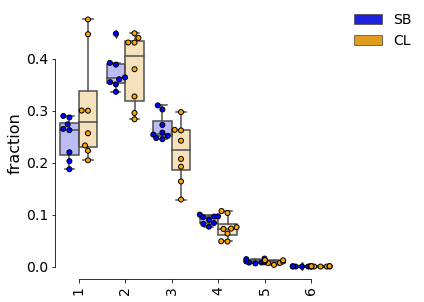

In [101]:
##### Compare the organization at high level to see if differences in combinations - more or less structured/compartmentalized
data_simp = [simp_df_SB, simp_df_CL]
df_num_count = comb_num_freq(data_list=data_simp)
df_num_count

In [104]:
df_SB

,B004_SB,B005_SB,B006_SB,B009_SB,B011_SB,B012_SB,B010_SB,B008_SB,count
combination,,,,,,,,,
"(6,)",0.119955,0.044992,0.061145,0.000287,0.050791,0.053286,0.125124,0.060848,1
"(0, 7)",0.112152,0.010528,0.099788,0.048947,0.063573,0.008389,0.054858,0.020162,2
"(0, 5, 7)",0.063464,0.036034,0.028596,0.039976,0.050814,0.031325,0.059750,0.027237,3
"(3, 6)",0.062498,0.010631,0.053847,0.010085,0.065206,0.061730,0.067673,0.101609,2
"(7,)",0.051855,0.023024,0.026009,0.003452,0.081414,0.000000,0.013084,0.000025,1
...,...,...,...,...,...,...,...,...,...
"(0, 3, 9)",0.000000,0.000000,0.000000,0.000011,0.000000,0.000744,0.002543,0.000157,3
"(1, 7, 8, 9)",0.000000,0.000000,0.000000,0.000011,0.000000,0.000587,0.000038,0.000000,4
"(0, 1, 4, 5, 7)",0.000000,0.000000,0.000000,0.000007,0.000189,0.000109,0.000006,0.000088,5


MannwhitneyuResult(statistic=10.0, pvalue=0.011974337439879718)


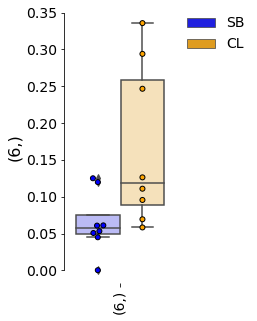

In [186]:
######### FOR COMPARING COMBINATIONS OF NEIGHBORHOODS STATISTICALLY ACROSS REPLICATES

#Set Neigh and make comparison
neigh_comb = (6,)

df1 = df_SB.loc[[neigh_comb]].T
df2 = df_CL.loc[[neigh_comb]].T
print(stats.mannwhitneyu(df1[df1.columns[0]],df2[df2.columns[0]]))

df1.reset_index(inplace=True)
df1[['donor', 'tissue']] = df1['index'].str.split("_",expand=True)
df2.reset_index(inplace=True)
df2[['donor', 'tissue']] = df2['index'].str.split("_",expand=True)
df_m = pd.concat([df1,df2])
df_m['combo'] = str(neigh_comb)


#swarmplot to compare 
plt.figure(figsize=(2,5))

ax = sns.boxplot(data = df_m, x='combo',  y=neigh_comb, hue = 'tissue', dodge=True, \
                 hue_order=plot_order1, palette=pal_tis)
ax = sns.swarmplot(data = df_m, x='combo', y=neigh_comb, hue = 'tissue', dodge=True, \
                  hue_order=plot_order1, edgecolor='black',linewidth=1, palette=pal_tis)
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
#ax.set_yscale(\log\)
plt.xlabel('')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:len(df_m['tissue'].unique())], labels[:len(df_m['tissue'].unique())],\
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
plt.xticks(rotation=90)
sns.despine(trim=True)

#pt.savefig(save_path+save_name+'_swarm_boxplot.png', format='png', dpi=300, transparent=True, bbox_inches='tight')


In [109]:
df_SB

,B004_SB,B005_SB,B006_SB,B009_SB,B011_SB,B012_SB,B010_SB,B008_SB
combination,,,,,,,,
"(6,)",0.119955,0.044992,0.061145,0.000287,0.050791,0.053286,0.125124,0.060848
"(0, 7)",0.112152,0.010528,0.099788,0.048947,0.063573,0.008389,0.054858,0.020162
"(0, 5, 7)",0.063464,0.036034,0.028596,0.039976,0.050814,0.031325,0.059750,0.027237
"(3, 6)",0.062498,0.010631,0.053847,0.010085,0.065206,0.061730,0.067673,0.101609
"(7,)",0.051855,0.023024,0.026009,0.003452,0.081414,0.000000,0.013084,0.000025
...,...,...,...,...,...,...,...,...
"(0, 3, 9)",0.000000,0.000000,0.000000,0.000011,0.000000,0.000744,0.002543,0.000157
"(1, 7, 8, 9)",0.000000,0.000000,0.000000,0.000011,0.000000,0.000587,0.000038,0.000000
"(0, 1, 4, 5, 7)",0.000000,0.000000,0.000000,0.000007,0.000189,0.000109,0.000006,0.000088


In [116]:
test1 = pd.DataFrame(0, index=np.arange(1, 9), columns=np.arange(1, 2))
test1

,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0


In [140]:
tt = np.array(list(diff_dict.values()))
bt = np.absolute(tt)
np.mean(bt)

0.007669373019454977

In [144]:
np.absolute(diff)>0.007

False

In [199]:
######### FOR COMPARING COMBINATIONS OF NEIGHBORHOODS STATISTICALLY ACROSS REPLICATES

#Set Neigh and make comparison
SB_simp_list = list(simp_df_SB.index.unique())
CL_simp_list = list(simp_df_CL.index.unique())
#diff_list = list(set(CL_simp_list) - set(SB_simp_list))
all_list = list(set(SB_simp_list + CL_simp_list))

#df_SB = simp_df_SB.set_index('combination')
#df_SB.drop(columns=['count',], inplace=True)
#df_CL = simp_df_CL.set_index('combination')
#df_CL.drop(columns=['count',], inplace=True)

sig_dict = {}
fc_dict ={}
diff_dict = {}
other_dict = {}
for neigh_comb in all_list:

    if neigh_comb in df_SB.index:
        df1 = df_SB.loc[[neigh_comb]].T
    else:
        df1 = pd.DataFrame(0, index=np.arange(1, 9), columns=np.arange(1, 2))
    
    if neigh_comb in df_CL.index:
        df2 = df_CL.loc[[neigh_comb]].T
    else:
        df2 = pd.DataFrame(0, index=np.arange(1, 9), columns=np.arange(1, 2))
    tt = stats.mannwhitneyu(df1[df1.columns[0]],df2[df2.columns[0]])
    FC = (df1[df1.columns[0]].mean()-df2[df2.columns[0]].mean())/df1[df1.columns[0]].mean()
    diff = df1[df1.columns[0]].mean()-df2[df2.columns[0]].mean()
    logfc = -np.log2(FC)
    if tt[1]<0.01 and np.absolute(diff)>0.007:
        sig_dict[neigh_comb]=tt[1]
        if np.isnan(logfc): 
            fc_dict[neigh_comb] = 1
        else:
            fc_dict[neigh_comb] = logfc
            
        diff_dict[neigh_comb]=diff
    other_dict[neigh_comb] = tt[1]
sig_dict

C:\Users\AKOYA-~1\AppData\Local\Temp/ipykernel_9180/983280716.py:30: RuntimeWarning: divide by zero encountered in double_scalars
  FC = (df1[df1.columns[0]].mean()-df2[df2.columns[0]].mean())/df1[df1.columns[0]].mean()
C:\Users\AKOYA-~1\AppData\Local\Temp/ipykernel_9180/983280716.py:32: RuntimeWarning: invalid value encountered in log2
  logfc = -np.log2(FC)


{(0, 5, 7, 9): 0.0004299484550753648,
 (0, 7): 0.0013808022089137366,
 (0, 9): 0.005554612275049106,
 (0, 2, 8): 0.00020496626593241102,
 (3, 5, 6, 7): 0.001938020724497375,
 (5, 7, 9): 0.0003926690730081587,
 (1,): 0.00020496626593241102,
 (0, 7, 9): 0.0013413210796613894,
 (7, 9): 0.0003926690730081587,
 (1, 9): 0.0007300309581211239,
 (0, 5, 9): 0.003280825051561365,
 (2, 7, 9): 0.0007300309581211239,
 (1, 2): 0.00236469865832883,
 (0, 7, 8): 0.00020496626593241102,
 (9,): 0.0007300309581211239,
 (1, 2, 9): 0.0007300309581211239,
 (0, 1, 9): 0.003280825051561365,
 (0, 8): 0.00020496626593241102,
 (1, 7, 9): 0.0007300309581211239,
 (0, 2, 9): 0.0007300309581211239,
 (2, 9): 0.0007300309581211239}

In [204]:
listother_dict.values()

NameError: name 'listother_dict' is not defined

In [209]:
#FDR correction
farray = list(fdrcorrection(pvals=list(other_dict.values()), alpha=0.05, method='indep', is_sorted=False)[0])
all_list = list(other_dict.values())
out = [i for (i, v) in zip(all_list, farray) if not v]
out

[0.396373263496624,
 0.041561468479951666,
 0.12382392305144829,
 0.21199949480821223,
 0.03760014943834645,
 0.43695153038171497,
 0.21544852186813368,
 0.06376365667892261,
 0.2765637227243004,
 0.20933068926462184,
 0.356595630508036,
 0.05178093558826699,
 0.06334280646149172,
 0.24741826905654868,
 0.24741826905654868,
 0.3964477515894803,
 0.1860146692852217,
 0.4790609632888714,
 0.03699531360391067,
 0.4790609632888714,
 0.3964477515894803,
 0.09463148165751273,
 0.04110841940617699,
 0.15921253335340807,
 0.3956955580640156,
 0.07797469680074769,
 0.06390380047377232,
 0.21199949480821223,
 0.21544852186813368,
 0.4374129884746219,
 0.1860146692852217,
 0.23804367222060707,
 0.24741826905654868,
 0.24678139485169465,
 0.3964477515894803,
 0.31825124345693306,
 0.2996207579178356,
 0.18244065702095907,
 0.0320465103925201,
 0.281761858238859,
 0.18530916990859775,
 0.15560092604216308,
 0.4374129884746219,
 0.1860146692852217,
 0.356595630508036,
 0.15921253335340807,
 0.211999

In [201]:
from statsmodels.stats.multitest import fdrcorrection

fdrcorrection(pvals=list(other_dict.values()), alpha=0.05, method='indep', is_sorted=False)[0]

array([ True, False,  True,  True,  True,  True,  True, False,  True,
       False, False,  True, False,  True,  True, False, False,  True,
       False,  True,  True,  True, False, False, False,  True,  True,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
       False,  True, False, False,  True, False,  True,  True,  True,
        True, False, False, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True, False,
       False, False,  True, False, False, False,  True, False,  True,
       False,  True,  True,  True,  True, False,  True, False,  True,
        True,  True, False,  True, False, False, False,  True,  True,
       False,  True, False, False, False,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True,

In [191]:
lmap

{'Plasma Cell Enriched': 0,
 'Mature Epithelial': 1,
 'Innate Immune Enriched': 2,
 'Stroma': 3,
 'Follicle': 4,
 'Adaptive Immune Enriched': 5,
 'Smooth Muscle': 6,
 'Secretory Epithelial': 7,
 'CD66+ Mature Epithelial': 8,
 'CD8+ T Enriched IEL': 9}

Ttest_indResult(statistic=4.040953967448474, pvalue=0.0012145698590491948)


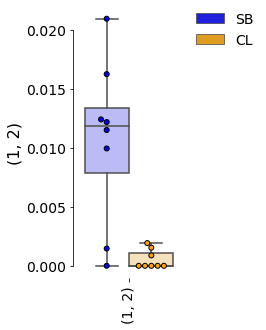

In [193]:
######### FOR COMPARING COMBINATIONS OF NEIGHBORHOODS STATISTICALLY ACROSS REPLICATES

#Set Neigh and make comparison
neigh_comb = (1, 2)

# df_SB = simp_df_SB.set_index('combination')
# df_SB.drop(columns=['count',], inplace=True)
# df_CL = simp_df_CL.set_index('combination')
# df_CL.drop(columns=['count',], inplace=True)

if neigh_comb in df_SB.index:
    df1 = df_SB.loc[[neigh_comb]].T
else:
    df1 = pd.DataFrame(0, index=df_SB.columns, columns=[neigh_comb])

if neigh_comb in df_CL.index:
    df2 = df_CL.loc[[neigh_comb]].T
else:
    df1 = pd.DataFrame(0, index=df_CL.columns, columns=[neigh_comb])    
    
#df1 = df_SB.loc[[neigh_comb]].T
#df2 = df_CL.loc[[neigh_comb]].T
print(stats.ttest_ind(df1[df1.columns[0]],df2[df2.columns[0]]))

df1.reset_index(inplace=True)
df1[['donor', 'tissue']] = df1['index'].str.split("_",expand=True)
df2.reset_index(inplace=True)
df2[['donor', 'tissue']] = df2['index'].str.split("_",expand=True)
df_m = pd.concat([df1,df2])
df_m['combo'] = str(neigh_comb)


#swarmplot to compare 
plt.figure(figsize=(2,5))

ax = sns.boxplot(data = df_m, x='combo',  y=neigh_comb, hue = 'tissue', dodge=True, \
                 hue_order=plot_order1, palette=pal_tis)
ax = sns.swarmplot(data = df_m, x='combo', y=neigh_comb, hue = 'tissue', dodge=True, \
                  hue_order=plot_order1, edgecolor='black',linewidth=1, palette=pal_tis)
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))
#ax.set_yscale(\log\)
plt.xlabel('')
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[:len(df_m['tissue'].unique())], labels[:len(df_m['tissue'].unique())],\
           bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.,frameon=False)
plt.xticks(rotation=90)
sns.despine(trim=True)

#pt.savefig(save_path+save_name+'_swarm_boxplot.png', format='png', dpi=300, transparent=True, bbox_inches='tight')
